In [5]:
# librerías a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [6]:
# cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# formateo la fecha y agrego campos por día/mes/año
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events['timestamp_month'] = events['timestamp'].dt.month
events['timestamp_year'] = events['timestamp'].dt.year
events['timestamp_weekday'] = events['timestamp'].dt.weekday_name
events[['timestamp_month', 'timestamp_year', 'timestamp_weekday']].head()

,timestamp_month,timestamp_year,timestamp_weekday
0,5,2018,Thursday
1,5,2018,Thursday
2,5,2018,Thursday
3,5,2018,Thursday
4,5,2018,Tuesday


In [4]:
# vemos de que años hay datos (son todos 2018)
events.groupby('timestamp_year')['timestamp'].count()

timestamp_year
2018    1011288
Name: timestamp, dtype: int64

In [5]:
# vemos de que meses hay datos (enero - junio)
events.groupby('timestamp_month')['timestamp'].count()

timestamp_month
1     19270
2     27886
3     77293
4    130008
5    474949
6    281882
Name: timestamp, dtype: int64

Text(0,0.5,'Cantidad de checkouts')

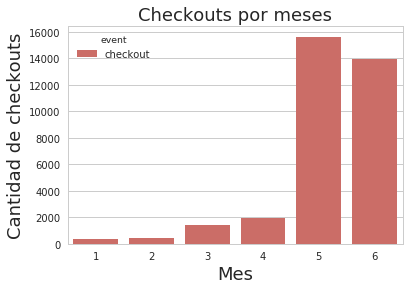

In [6]:
# vemos que hay muchos más checkouts en mayo y junio (¿por qué la diferencia?)
checkouts = events[(events['event'] == 'checkout')]
g = sns.countplot(x="timestamp_month", hue="event", data=checkouts, palette="hls")
g.set_title("Checkouts por meses", fontsize=18)
g.set_xlabel("Mes", fontsize=18)
g.set_ylabel("Cantidad de checkouts", fontsize=18)

Text(0,0.5,'Cantidad de checkouts')

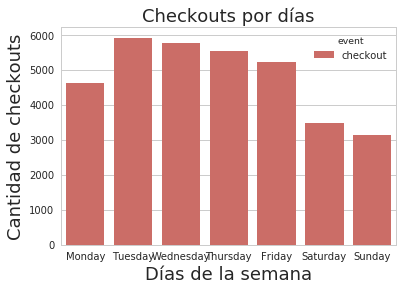

In [14]:
# que días hay más compras (bastante parejo)
checkouts = events[(events['event'] == 'checkout')]
g = sns.countplot(x="timestamp_weekday", hue="event", data=checkouts, palette="hls", order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])
g.set_title("Checkouts por días", fontsize=18)
g.set_xlabel("Días de la semana", fontsize=18)
g.set_ylabel("Cantidad de checkouts", fontsize=18)

In [34]:
# falta ver un poco mejor la condición (quiero ver tiempo de permanencia en sitio)
def diff(s):
    return s.max() - s.min()
events.groupby(['person']).agg({'timestamp':['max', 'min', diff]}).head()

timestamp                                     
                         max                 min             diff
person                                                           
0004b0a2 2018-05-31 23:38:40 2018-05-31 23:38:05  0 days 00:00:35
0006a21a 2018-05-29 13:29:35 2018-05-29 13:29:25  0 days 00:00:10
000a54b2 2018-05-24 11:34:32 2018-04-09 20:12:31 44 days 15:22:01
00184bf9 2018-05-17 04:45:15 2018-04-06 05:12:05 40 days 23:33:10
0019c395 2018-05-17 00:11:26 2018-05-17 00:08:56  0 days 00:02:30

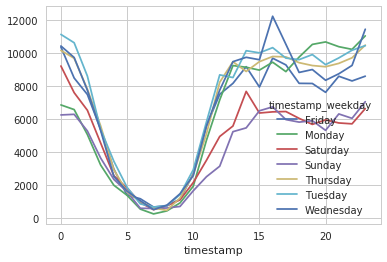

In [15]:
# eventos por hora y día de la semana
events.groupby([events['timestamp'].dt.hour, 'timestamp_weekday'])['event'].count().unstack().plot()

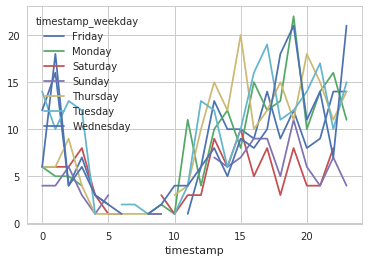

In [17]:
# eventos por hora y día de la semana
conversion_events = events[events['event'] == 'conversion']
conversion_events.groupby([events['timestamp'].dt.hour, 'timestamp_weekday'])['event'].count().unstack().plot()